In [4]:
import numpy as np
import quantities as pq
import matplotlib.pyplot as plt
from neo.io import AxonIO
import itertools
%matplotlib inline

In [5]:
sm_arealist = np.linspace(1e-12,5000e-12,2)
RMlist = np.linspace(0.01,5,2)
Cmlist = np.linspace(0.1e-12,1000e-12,2)

3000
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


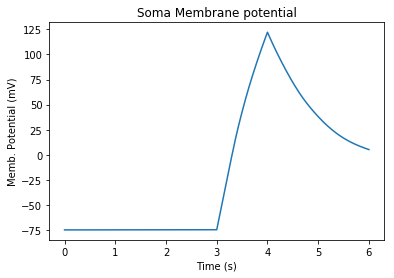

1
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


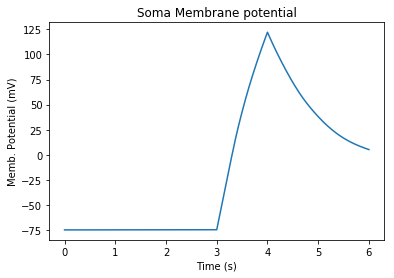

2
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


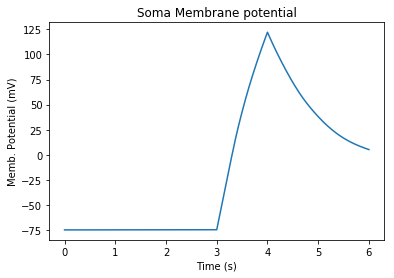

3
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


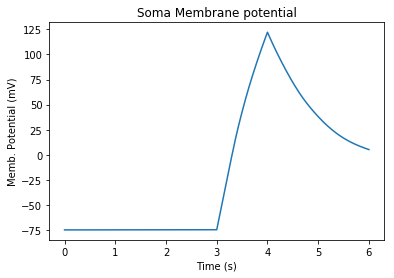

4
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


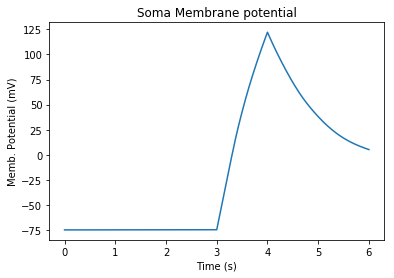

5
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


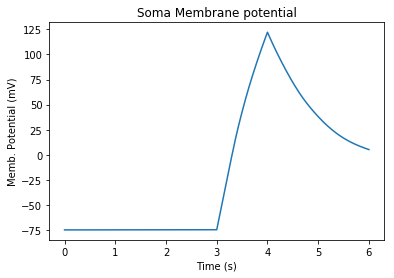

6
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


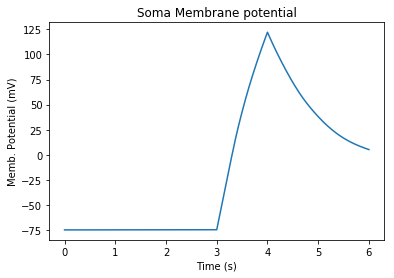

7
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


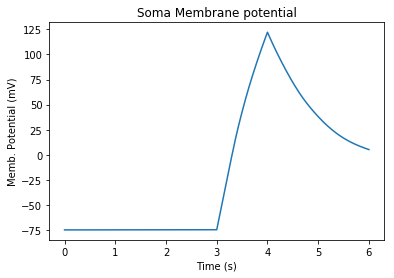

8
Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.


In [ ]:
j=1
for [sm_area,RM,Cm] in itertools.product(sm_arealist,RMlist,Cmlist):
    exec(open('/mnt/c/Analkumar2/Study/Biology/Neuroscience/2018 - 23 PhD Thesis/Thesis work/Bianchi2002_WT_CA1/CA1_WT.py').read())
    V_trace = moose.element('/model/graphs/plot0').vector
    start = False
    sp_start = []
    sp_end = []
    for i in range(0,len(V_trace)):
        if V_trace[i]>0 and start == False:
            start = True
            sp_start.append(V_trace[i])
        if V_trace[i]<0 and start == True:
            start = False
            sp_end.append(V_trace[i])
    sp_peak = np.add(sp_start,sp_end)/2
    #if len(sp_peak)>2:
       # ax =plt.subplot(1,1,1)
       # ax.plot(V_trace)
       # plt.draw()
        #plt.pause(0.01)
    ax = plt.subplot(1,1,1)
    ln, = ax.plot(V_trace)
    plt.draw()
    plt.pause(0.00001)
    ln.remove()
    
    print(j, end='\r')
    j = j+1

In [93]:
moose.showfield('/model/elec/soma/Ca_conc')


[ /model[0]/elec[0]/soma[0]/Ca_conc[0] ]
B                = 28789.6377
Ca               = 0.0001002729698108833
CaBasal          = 0.0001
Ca_base          = 0.0001
ceiling          = 1000000000.0
className        = ZombieCaConc
diameter         = 2.8e-05
dt               = 0.0
fieldIndex       = 0
floor            = 0.0
idValue          = 8078
index            = 0
length           = 0.000170523153312745
name             = Ca_conc
numData          = 1
numField         = 1
path             = /model[0]/elec[0]/soma[0]/Ca_conc[0]
tau              = 1.4000000000000001
thick            = 0.0001779
tick             = -2


In [99]:
def surfA(A,B):
    h = np.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2+(A[2]-B[2])**2)
    return np.pi*(A[3]+B[3])/2*np.sqrt(h**2+(A[3]/2-B[3]/2)**2)

In [107]:
ptsl0 = [[2.497,-13.006,11.13,4.58], [2.497,-13.006,11.12,4.58]]
ptsl1 = [[2.497,-13.006,11.12,4.58], [1.954,-10.542,18.72,6.14], [1.785,-8.96,18.72,6.46],
       [1.423,-7.729,15.84,6.46], [1.423,-7.559,15.84,6.46], [1.242,-6.508,15.84,7.4],
       [1.073,-5.277,15.92,8.038], [0.531,-3.695,16,10.56], [0.18,-2.632,16,11.5],
       [-0.18,-1.762,16,12.14], [-0.361,-1.231,16.079,12.76], [-0.361,-1.05,16.079,12.76],
       [-0.711,-0.35,16.079,12.76], [-0.531,0.7,16.079,12.76], [-0.531,1.932,16.16,12.46]]
ptsl2 = [[-0.531,1.932,16.16,12.46], [0.006,1.146,20.406,1.4]]
ptsl3 = [[-0.531,1.932,16.16,12.46], [-0.18,2.983,16.239,10.24], [-0.361,4.214,16.239,8.36],
        [0.361,6.327,16.16,5.2]]
ptsl4 = [[0.361,6.327,16.16,5.2], [0.468,6.305,16.779,1.662], [0.485,7.311,17.6,1.42]]


In [109]:
TsurfA0 = 0
for i in range(len(ptsl0)-1):
    TsurfA0 = TsurfA0+surfA(ptsl0[i],ptsl0[i+1])
    
TsurfA1 = 0
for i in range(len(ptsl1)-1):
    TsurfA1 = TsurfA1+surfA(ptsl1[i],ptsl1[i+1])
    
TsurfA2 = 0
for i in range(len(ptsl2)-1):
    TsurfA2 = TsurfA2+surfA(ptsl2[i],ptsl2[i+1])

TsurfA3 = 0
for i in range(len(ptsl3)-1):
    TsurfA3 = TsurfA3+surfA(ptsl3[i],ptsl3[i+1])
    
TsurfA4 = 0
for i in range(len(ptsl4)-1):
    TsurfA4 = TsurfA4+surfA(ptsl4[i],ptsl4[i+1])

In [110]:
TsurfA0+TsurfA1+TsurfA2+TsurfA3+TsurfA4

926.939406607185

In [111]:
2.5e-6*10*927e-12

2.3175e-14

In [118]:
a = [1.0,4,7]
b = [56,90,100.0,45.6]
for [ai,bi] in itertools.product(a,b):
    print([ai,bi])

[1.0, 56]
[1.0, 90]
[1.0, 100.0]
[1.0, 45.6]
[4, 56]
[4, 90]
[4, 100.0]
[4, 45.6]
[7, 56]
[7, 90]
[7, 100.0]
[7, 45.6]


In [14]:
sm_area

5e-09

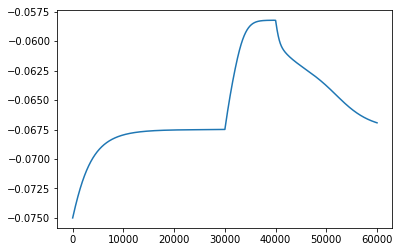

In [15]:
plt.plot(V_trace)
plt.show()

# Genetic

In [9]:
import numpy as np
import quantities as pq
import matplotlib.pyplot as plt
from neo.io import AxonIO
import itertools
import pandas as pd

In [16]:
Emlist = np.linspace(-0.08,-0.06, 40)
sm_arealist = np.linspace(1e-12,5000e-12,500)
RMlist = np.linspace(0.01,5,50)
Cmlist = np.linspace(1e-12,1000e-12,500)
Na_SGbarlist = np.linspace(200,500,300)
KDR_SGbarlist = np.linspace(20,200,200)
KA_SGbarlist = np.linspace(1,20,100)
KMGbarlist = np.linspace(1,20,100)
hGbarlist =  np.linspace(0.01,1,100)
CaTGbarlist = np.linspace(0.01,1,100)
CaRGbarlist = np.linspace(0.01,1,100)
CaLGbarlist = np.linspace(0.1,2,50)
KsAHPGbarlist = np.linspace(1,500,500)
KmAHPGbarlist = np.linspace(1,5000,500)

In [15]:
Pop = np.zeros([100,15])
a = np.zeros([2,3])
adf = pd.DataFrame(a)
adf.columns = ['Jar', 'jar', 'Binks']
adf

,Jar,jar,Binks
0,0.0,0.0,0.0
1,0.0,0.0,0.0
